In [1]:
import pandas as pd

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:

outstring = []
with open('scale/scale','rb') as f:
#hexdata = f.read().hex()
    tHex = f.read(1).hex()
    index = 0
    aline = []
    while tHex:

        if index%4==0 and index!=0:
            index = 0
            outstring.append(aline)
            aline=[]
            aline.append(int(tHex,base=16))
            index +=1
        else:
            aline.append(int(tHex,base=16))
            index +=1

        tHex = f.read(1).hex()


In [3]:
df_outstring = pd.DataFrame(outstring)
df_outstring.to_csv('scale/scale_output_v1_4.csv',index=False)

In [2]:
df_scale = pd.read_csv('scale/scale_output_v1_4.csv')
df_scale.head()

,0,1,2,3
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [83]:
df_lines = []
aline = []

for k, v in df_scale.iterrows():    
    aline.extend(v)
    #split = [i for i in range(len(aline)-1) if (v[0]==v[1]==72 or v[2]==v[3]==72) and aline[i]==72 and aline[i+1]==72]
    if v[0]==v[1]==72:
        df_lines.append(aline[:-4])
        aline = aline[-2:]
    if v[2]==v[3]==72:
        df_lines.append(aline[:-2])
        aline = []

if len(aline)>0:    
    df_lines.append(aline)
    
df_lines = df_lines[1:]
print(len(df_lines))

12350


In [84]:
df_combine = []
skip = False
for i in range(1, len(df_lines), 1):
    try:
        if len(df_lines[i-1])<92:
            aline = df_lines[i-1]
            aline.extend([72,72])
            aline.extend(df_lines[i])
            df_lines[i] = aline
        else:
            df_combine.append(df_lines[i-1])
    except:
        print(i)
df_combine.append(df_lines[-1])
print(len(df_combine))

12345


In [85]:
df_lines = pd.DataFrame(df_combine)
df_lines = df_lines.fillna(value=0)

df_lines.to_csv('scale/scale_output_v1_4_results.csv', index=False)

In [2]:
df_scale23 = pd.read_csv('scale/scale_output_v1_4_results.csv')

In [49]:
def computeTime(s0,s1):
    time = [int(s) for s in s0.split(',')]
    time_shift = [int(s) for s in s1.split(',')]
    for i in range(0, 3, 1):
        if time_shift[i] < time[i] or time_shift[i]<0:
            time_shift[i] = time_shift[i] + 256
            time_shift[i+1] = time_shift[i+1] -1
    diff = [(t_shift-t) for t, t_shift in zip(time, time_shift)]
    diff = sum([diff[d]*256**d for d in range(4)])
    #diff = s1-s0
    if time_shift[2] < 128:
        diff = (diff) / 2**((64-time_shift[3]+1)*2-1)
    else:
        diff = (diff ) / 2**((64-time_shift[3]+1)*2-2)
        
        
    divider = abs((time[2]+(time[3]-64)*256)//128-1)
    increase = diff #sum([diff[d]*256**d for d in range(4)])
    return increase/(839)#*(divider+1)) #','.join([str(d) for d in diff])+','+str(increase)+','+str(divider)

df_scale23['combine'] = df_scale23[['0','1','2','3']].apply(lambda s:','.join([str(t) for t in s]),axis=1)
df_scale23['shift'] = df_scale23['combine'].shift(-1)
df_scale23 = df_scale23.fillna(value='0,0,0,0')
df_scale23['diff'] = df_scale23[['combine','shift']].apply(lambda s: computeTime(s[0],s[1]),axis=1)


In [50]:

df_scale23['time_diff'] = df_scale23['diff'].apply(lambda s: 1 if s < 0.9 else s)
timelist = df_scale23['time_diff'].tolist()
timelist = timelist[::-1]
timelist[0]=5
for i in range(1, len(timelist),1):
    timelist[i] = timelist[i-1] - round(timelist[i]*0.0004,4)
df_scale23['time'] = timelist[::-1]

In [45]:
def computeTime(s0,s1,s2,s3):
    time = [int(s) for s in s0.split(',')]
    time_shift = [int(s) for s in s1.split(',')]
    s0 = sum([time[d]*256**d for d in range(4)])
    s1 = sum([time_shift[d]*256**d for d in range(4)])
    diff = s1-s0
    if s2 < 128:
        diff = (diff) / 2**((64-s3+1)*2-1)
    else:
        diff = (diff ) / 2**((64-s3+1)*2-2)
    return round(diff/839,1)

#df_scale23['time'] = df_scale23[['0','1','2','3']].apply(lambda s:s[0]+s[1]*256+s[2]*256*256+s[3]*256*256*256, axis=1)
df_scale23['time'] = df_scale23[['0','1','2','3']].apply(lambda s:','.join([str(t) for t in s]), axis=1)
df_scale23['time_shift'] = df_scale23['time'].shift(-1)
df_scale23 = df_scale23.fillna(value='0,0,0,0')
#df_scale23['time_diff'] = df_scale23[['time','time_shift','2','3']].apply(lambda s: computeTime(s[0],s[1],s[2],s[3]),axis=1)
df_scale23['time_diff'] = df_scale23[['time','time_shift','2','3']].apply(lambda s: computeTime(s[0],s[1],s[2],s[3]),axis=1)

In [48]:
df_scale23['time_diff'] = df_scale23['time_diff'].apply(lambda s: 1 if s < 0.9 else s)
timelist = df_scale23['time_diff'].tolist()
timelist = timelist[::-1]
timelist[0]=5
for i in range(1, len(timelist),1):
    timelist[i] = timelist[i-1] - round(timelist[i]*0.0004,4)
df_scale23['time'] = timelist[::-1]

df_scale23.to_csv('scale/scale_output_v1_4_time.csv',index=False)   

In [51]:
df_scale23.to_csv('scale/scale_output_v1_4_time.csv',index=False)

In [13]:
def computePositive(s):
    r = sum([s[i]*256**(3-i) for i in range(4)])/20
    return r
def computeDim(s):
    c = [255,255,255,256]
    sign = 1
    if s[0]>=220:
        s = [c[i]-s[i] for i in range(4)]
        sign = -1
    
    r = computePositive(s)*sign
    return r
for i in range(1, 23):
    #df_scale.append(df_scale23[[str(i*4+t) for t in range(4)]].apply(computeDim, axis=1) )
    df_scale23[str(i*10+180)] = df_scale23[[str(i*4+t) for t in range(4)]].apply(computeDim, axis=1) 


In [18]:
df_scale = df_scale23[[str(i*10+180) for i in range(1,23)] ]
df_scale['time'] = df_scale23['diff'].tolist()
df_scale['time'] = df_scale['time'].apply(lambda s: s*1.0/60000)
df_scale.head()

<ipython-input-18-f87636bbf714>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scale['time'] = df_scale23['diff'].tolist()
<ipython-input-18-f87636bbf714>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scale['time'] = df_scale['time'].apply(lambda s: s*1.0/60000)


,190,200,210,220,230,240,250,260,270,280,...,320,330,340,350,360,370,380,390,400,time
0,78.0,0.0,70.0,83.0,-2.0,1.0,15.0,0.0,0.0,50.0,...,-2.0,0.0,13.0,1.0,-1.0,1.0,39.0,0.0,-1.0,19.269869
1,78.0,1.0,70.0,83.0,0.0,0.0,17.0,-1.0,1.0,50.0,...,-1.0,-1.0,12.0,0.0,1.0,0.0,39.0,3.0,1.0,0.166639
2,80.0,0.0,69.0,83.0,-1.0,1.0,17.0,-1.0,0.0,52.0,...,0.0,1.0,12.0,1.0,1.0,1.0,38.0,3.0,-2.0,0.098384
3,81.0,1.0,71.0,82.0,0.0,-1.0,14.0,1.0,-1.0,51.0,...,-2.0,-1.0,12.0,0.0,-1.0,0.0,39.0,2.0,-2.0,0.068255
4,79.0,0.0,68.0,84.0,1.0,0.0,16.0,-1.0,1.0,50.0,...,-1.0,1.0,13.0,1.0,0.0,1.0,39.0,3.0,1.0,0.064256


In [38]:
df_scale.to_csv('scale/scale_output_v1_4_time.csv',index=False)   

In [45]:
def computeTime(s0,s1,s2,s3):
    time = [int(s) for s in s0.split(',')]
    time_shift = [int(s) for s in s1.split(',')]
    s0 = sum([time[d]*256**d for d in range(4)])
    s1 = sum([time_shift[d]*256**d for d in range(4)])
    diff = s1-s0
    if s2 < 128:
        diff = (diff) / 2**((64-s3+1)*2-1)
    else:
        diff = (diff ) / 2**((64-s3+1)*2-2)
    return round(diff/839,1)

#df_scale23['time'] = df_scale23[['0','1','2','3']].apply(lambda s:s[0]+s[1]*256+s[2]*256*256+s[3]*256*256*256, axis=1)
df_scale23['time'] = df_scale23[['0','1','2','3']].apply(lambda s:','.join([str(t) for t in s]), axis=1)
df_scale23['time_shift'] = df_scale23['time'].shift(-1)
df_scale23 = df_scale23.fillna(value='0,0,0,0')
#df_scale23['time_diff'] = df_scale23[['time','time_shift','2','3']].apply(lambda s: computeTime(s[0],s[1],s[2],s[3]),axis=1)
df_scale23['time_diff'] = df_scale23[['time','time_shift','2','3']].apply(lambda s: computeTime(s[0],s[1],s[2],s[3]),axis=1)

In [48]:
df_scale23['time_diff'] = df_scale23['time_diff'].apply(lambda s: 1 if s < 0.9 else s)
timelist = df_scale23['time_diff'].tolist()
timelist = timelist[::-1]
timelist[0]=5
for i in range(1, len(timelist),1):
    timelist[i] = timelist[i-1] - round(timelist[i]*0.0004,4)
df_scale23['time'] = timelist[::-1]

df_scale23.to_csv('scale/scale_output_v1_4_time.csv',index=False)   

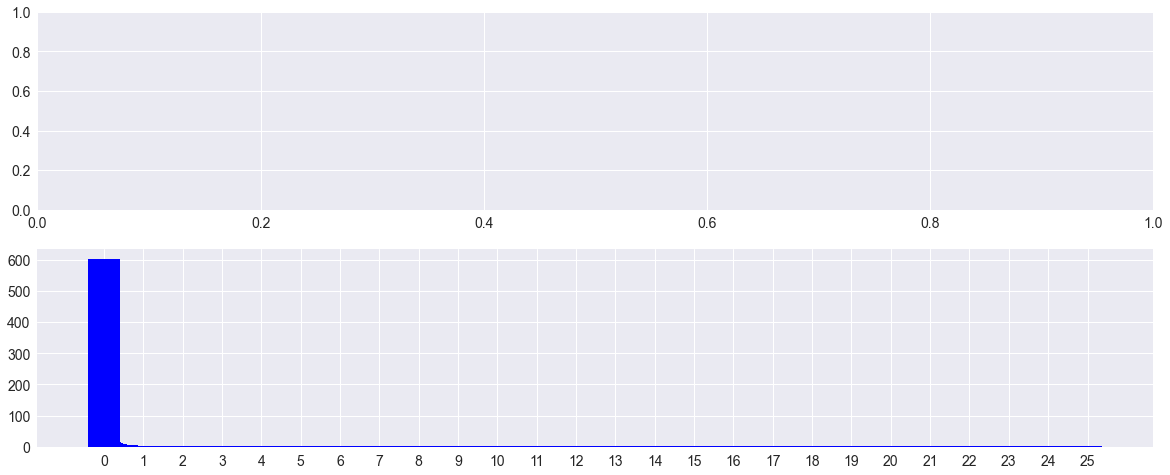

In [81]:

import numpy as np

import matplotlib.pyplot as plt

import math

from numpy.fft import fft


def gen_wave (freq, amp, T, sr):

    time = np.arange(0,T,1/sr)
    
    X = amp*np.sin(2*np.pi*freq*time)
    
    return time,X


plt.style.use("seaborn")
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14

f, axarr = plt.subplots(2, figsize=(20, 8))

sr=50 #in Hz

# x,y   = gen_wave(3,2,1,sr)
# x,y2   = gen_wave(5,3,1,sr)

# y = y + y2

# axarr[0].plot(x, y)
yy = df_scale['0']
n = len(yy) 
p = fft(yy) # take the fourier transform 

mag = np.sqrt(p.real**2 + p.imag**2)

mag = mag * 2 / n

mag = mag[0:math.ceil((n)/2.0)]

x = np.arange(0, len(mag), 1.0) * (sr / n)

axarr[1].bar(x, mag, color='b')
axarr[1].xaxis.set_ticks(np.arange(min(x), max(x)+1, 1.0))

plt.show()


In [82]:
mag_int = [int(m) for m in mag]

sorted([m for k,m in enumerate(mag_int) if not m in mag_int[:k]])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 603]

In [83]:
yy = df_scale['0'].tolist()

sr=50 #in Hz

n = len(yy) 
p = fft(yy) # take the fourier transform 

mag = np.sqrt(p.real**2 + p.imag**2)

mag = mag * 2 / n

mag = mag[0:math.ceil((n)/2.0)]
mag, len(mag)

(array([6.03542234e+02, 1.59809026e+01, 1.52670061e+01, ...,
        1.25876211e+00, 9.78243752e-01, 2.81933277e-01]),
 1835)

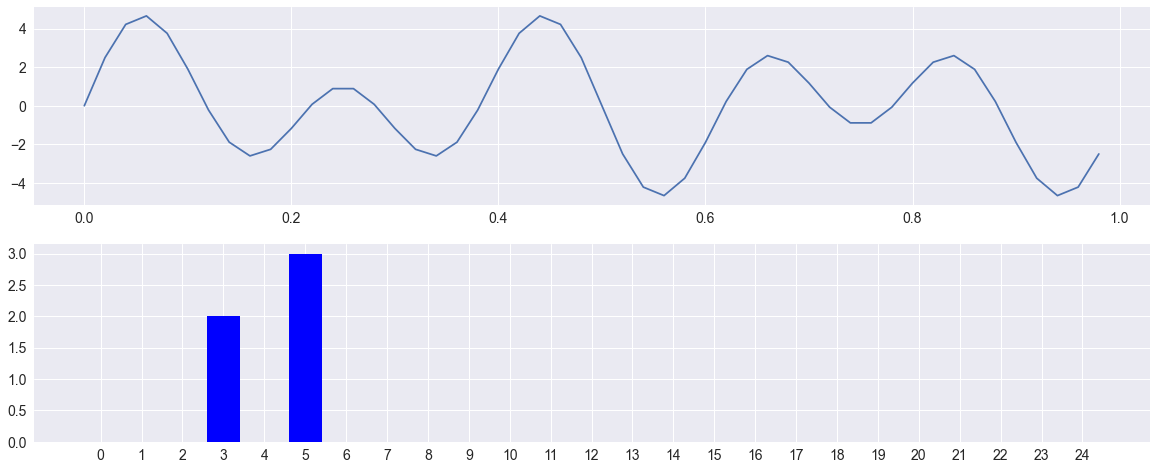

In [59]:
"""
(C) 2018 Nikolay Manchev

This work is licensed under the Creative Commons Attribution 4.0 International
License. To view a copy of this license, visit http://creativecommons.org/licenses/by/4.0/.
"""


import numpy as np

import matplotlib.pyplot as plt

import math

from numpy.fft import fft


def gen_wave (freq, amp, T, sr):

    time = np.arange(0,T,1/sr)
    
    X = amp*np.sin(2*np.pi*freq*time)
    
    return time,X


plt.style.use("seaborn")
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14

f, axarr = plt.subplots(2, figsize=(20, 8))

sr=50 #in Hz

x,y   = gen_wave(3,2,1,sr)
x,y2   = gen_wave(5,3,1,sr)

y = y + y2

axarr[0].plot(x, y)

n = len(y) 
p = fft(y) # take the fourier transform 

mag = np.sqrt(p.real**2 + p.imag**2)

mag = mag * 2 / n

mag = mag[0:math.ceil((n)/2.0)]

x = np.arange(0, len(mag), 1.0) * (sr / n)

axarr[1].bar(x, mag, color='b')
axarr[1].xaxis.set_ticks(np.arange(min(x), max(x)+1, 1.0))

plt.show()





